## HACKATHON ---- A PERFECT FIT 2021 USING NATURAL LANGUAGE PROCESSING

## Packages : 

In [88]:
# standard packages:
import io
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt

# text extraction from pdf :
from pdfminer.high_level import extract_text
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

## Reading Datasets : 

In [89]:
### path to read the resumes :
pdf_path = "K:/Hackerath Hackathon 2021/A Perfect Fit Hackerearth ML Challenge/train-resume-combined.pdf"
pdf_path2 = "K:/Hackerath Hackathon 2021/A Perfect Fit Hackerearth ML Challenge/test-resume-combined.pdf"
pdf_path3 = "K:/Hackerath Hackathon 2021/A Perfect Fit Hackerearth ML Challenge/dataset/Job description.pdf"

In [90]:
# calling above function and extracting text

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as fh:
        # iterate over all pages of PDF document
        for page in PDFPage.get_pages(fh, caching=True, check_extractable=True):
            # creating a resoure manager
            resource_manager = PDFResourceManager()
            
            # create a file handle
            fake_file_handle = io.StringIO()
            
            # creating a text converter object
            converter = TextConverter(
                                resource_manager, 
                                fake_file_handle, 
                                codec = 'utf-8', 
                                laparams=LAParams()
                        )

            # creating a page interpreter
            page_interpreter = PDFPageInterpreter(
                                resource_manager, 
                                converter
                            )

            # process current page
            page_interpreter.process_page(page)
            
            # extract text
            text = fake_file_handle.getvalue()
            yield text

            # close open handles
            converter.close()
            fake_file_handle.close()


In [109]:

description = pd.Series(extract_text_from_pdf(pdf_path)).values         # train data consisting of all train resumes
description2 =  pd.Series(extract_text_from_pdf(pdf_path2)).values      # test data consisting of all test resumes 
description3 = pd.Series(extract_text_from_pdf(pdf_path3)).values       # job description 

In [110]:
train = pd.read_csv("K:/Hackerath Hackathon 2021/A Perfect Fit Hackerearth ML Challenge/dataset/train.csv")
test = pd.read_csv("K:/Hackerath Hackathon 2021/A Perfect Fit Hackerearth ML Challenge/dataset/test.csv")
# description is the resume details 
train['Description'] = description    
test['Description'] = description2

In [111]:
train = train.reindex(columns=['CandidateID','Description','Match Percentage'])        # rearranging column position

print("shape of train data :",train.shape)
print("\nshape of test data :",test.shape)
print("\nTrain Datasets :\n\n",train.head())
print("\n")
print("test Datasets :\n\n",test.head())

shape of train data : (90, 3)

shape of test data : (60, 2)

Train Datasets :

      CandidateID                                        Description  \
0  candidate_011  JACOB SMITH\n\nF R E S H E R\n\nPERSONAL PROFI...   
1  candidate_113  Brianna Williams\n\nJ U N I O R   D E V E L O ...   
2  candidate_123  M A S O N   Q U A D R A D O\nASSOCIATE ANALYST...   
3  candidate_012  R O D N E Y   M I C H A E L S\n\nA S S O C I A...   
4  candidate_002  JENNIFER ARMSTRONG\n\nC O M P U T E R   V I S ...   

   Match Percentage  
0             13.60  
1             36.63  
2             54.93  
3             41.46  
4             48.91  


test Datasets :

      CandidateID                                        Description
0  candidate_014  O L I V I A   S A N T O S\n\nC O N S U L T A N...
1  candidate_098  ARMIN FITZGERALD\n\nD A   T   A     M   A   N ...
2  candidate_075  GRACE BAILRY\n\nM A C H I N E   L E A R N I N ...
3  candidate_016  A M E L I A   M A R T I N\n\nD A T A   S C I E...
4

## Text Preprocessing : 

In [112]:
'''
STEP 1 : WORD FORMATTING :
'''

import wordninja

def no_space(text):
    """
    Return :- string removing all spaces
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+'
    without_space = re.sub(pattern=single_char_pattern, repl="", string=text)
    return without_space

def rejoin_words(text):
    """
    Target : to join the splitted words 
             to find the meaningful words
    Return :- string after joining the splitted words
    Input :- string
    Output :- string
    """
    pattern = r'\s+'
    char = no_space(text)
    word = wordninja.split(char)
    
    return ' '.join(word)


import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_no_ssplit=True, tokenize_pretokenized=True)    
# tokenize_no_ssplit=True to recognize only newline "\n\n"
# tokenize_pretokenized=True to recognize "\n"

def word_formatting(text) :
    doc = nlp(text)
    length = len(doc.sentences)
    sentence=""
    line = "\n"
    for i in range(length):  
        if i>0 and i<=3:                             # do not need names
            sentence+=doc.sentences[i].text+"\n"
        elif i>3:
            line += doc.sentences[i].text+"\n"
    text = rejoin_words(sentence)
    text = text + " " + line
    
    pattern1 = "E D U C A T I O N"
    pattern2 = "A C T I V I T I E S"
    pattern3 = "E X P E R I E N C E"
    pattern4 = "P R O J E C T S"
    pattern5 = "A N D A W A R D S"
    pattern6 = "I am"
    pattern7 = "●"
    pattern8 = "13585"
    pattern9 = "ABC"
    word1 = "nlp"
    word2 = "ml"
    word3 = "ai"
    text = re.sub(pattern1 , "Education" , text)
    text = re.sub(pattern2 , "Activity" , text)
    text = re.sub(pattern3 , "Experience" , text)
    text = re.sub(pattern4 , "Project" , text)
    text = re.sub(pattern5 , "" , text) 
    text = re.sub(pattern6 , "" , text)
    text = re.sub(pattern7 , "" , text)
    text = re.sub(pattern8 , "" , text)
    text = re.sub(word1.upper() , "natural language process" , text)
    text = re.sub(word1.lower() ,"natural language process",text)
    text = re.sub(word2.upper() , "machine learn" , text)
    text = re.sub(word2.lower() , "machine learn" , text)
    text = re.sub(word3.upper() , "artificial intelligence" , text)
    text = re.sub(word3.lower() , "artificial intelligence" , text)
    
    return text

2021-09-13 02:21:56 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2021-09-13 02:21:56 INFO: Use device: cpu
2021-09-13 02:21:56 INFO: Loading: tokenize
2021-09-13 02:21:56 INFO: Done loading processors!


In [113]:
'''
STEP 2 : SPELLING CORRECTION
'''
# Implementation of spelling correction using python pyspellchecker library

from spellchecker import SpellChecker

spell_corrector = SpellChecker()

# spelling correction using spellchecker
def spell_correction(text):
    """
    Return :- text which have correct spelling words
    Input :- string
    Output :- string
    """
    # initialize empty list to save correct spell words
    correct_words = []
    # extract spelling incorrect words by using unknown function of spellchecker
    misSpelled_words = spell_corrector.unknown(text.split())

    for each_word in text.split():
        if each_word in misSpelled_words:
            right_word = spell_corrector.correction(each_word)
            correct_words.append(right_word)
        else:
            correct_words.append(each_word)

    # joining correct_words list into single string
    correct_spelling = ' '.join(correct_words)
    return correct_spelling

In [114]:
'''
STEP 3 : REMOVE STOPWORDS
'''

# Implementation of removing stopwords using all stop words from nltk, spacy, gensim


import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import spacy
import gensim

def remove_stopwords(text):
    """
    Return :- String after removing stopwords
    Input :- String
    Output :- String
    """
    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw

# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))
sp = spacy.load('en_core_web_sm')
# list of stopwords from spacy
stopwords_spacy = list(sp.Defaults.stop_words)
# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)
# all unique stop words
all_stopwords = list(set(all_stopwords))
print("Total number of Stopwords :- ", len(all_stopwords))
print("List of stopwords : ", all_stopwords)

Total number of Stopwords :-  412
List of stopwords :  ['done', 'every', 'after', 'same', 'call', 'below', 'along', 'only', 'ma', 'these', '’ll', 'herein', 'someone', 'about', 'yourselves', 'five', 'except', 'ten', 'he', 'of', 'above', 'eg', 'really', 'meanwhile', 'must', 'another', 'computer', 're', "wouldn't", 'bottom', 'just', 'haven', 'throughout', 'the', "needn't", 'see', 'with', 'hereafter', 'already', 'whether', 'several', 'for', 'had', "doesn't", 'down', "haven't", 'sometimes', 'very', 'sincere', 'him', 'there', 'ain', "'ll", 'often', 'sometime', 'system', 'name', 'although', 'ie', 'thereafter', 't', '’re', 'around', 'mustn', 'back', 'beside', 'describe', 'be', 'part', "hasn't", 'becomes', 'somehow', 'km', 'namely', 'aren', 'off', 'con', 'thereby', 'two', 'get', 'yours', 'though', 'well', 'why', 'than', 'anyone', 'myself', 'does', 'whereby', 'before', 'move', 'nevertheless', 'hence', 'fill', "weren't", 'no', 've', 'up', 'always', 'won', 'using', 'which', 'yourself', 'and', "are

In [115]:
'''
STEP 4 : LEMMATIZATION :
'''

# Implementation of Lemmatization using nltk :

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):          # It was trained with treebank_tag

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    

def lemmatization(text):
    """
    Result :- string after stemming
    Input :- String
    Output :- String
    """
    # word tokenization
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index],wordnet.ADJ)
        tokens[index] = lemma_word
    text = " ".join(tokens)
    
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index],wordnet.VERB)
        tokens[index] = lemma_word
    text = " ".join(tokens)
    
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index],wordnet.NOUN)
        tokens[index] = lemma_word
    text = " ".join(tokens) 
    
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index],wordnet.ADV)
        tokens[index] = lemma_word
    return " ".join(tokens)


# initialize lemmatizer object
lemma = WordNetLemmatizer()


In [116]:
'''
STEP 5 : REMOVING PUNCTUATIONS :
'''

# Implementation of removing punctuations using string library

from string import punctuation

def remove_punctuation(text):
    """
    Return :- String after removing punctuations
    Input :- String
    Output :- String
    """
    return text.translate(str.maketrans('', '', punctuation))

In [117]:
# Converting to lower case :

'''
STEP 6 : LOWER CASE CONVERSION
'''

def lower_case_conversion(text):
    """
    Input :- string
    Output :- lowercase string
    """
    lower_text = text.lower()
    return lower_text

In [118]:
# Remove duplicate words :
'''
STEP 7 : REMOVE DUPLICATE WORDS 
'''

def remove_duplicate(text):
    words = text.split()
    return " ".join(sorted(set(words), key=words.index))

In [119]:
# Remove numbers from text :
'''
STEP 8 : REMOVE NUMBERS :
'''

def remove_numbers(text):
    """
    Return :- String without numbers
    input :- String
    Output :- String
    """
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

In [120]:
# Remove single characters :
'''
STEP 9 : Remove single characters :
'''

def remove_single_char(text):
    """
    Return :- string after removing single characters
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc


In [121]:
# Removing Extra Whitespaces
'''
STEP 10 : Remove Extra Spaces :
'''

import re

def remove_extra_spaces(text):
    """
    Return :- string after removing extra whitespaces and double spaces
    Input :- String
    Output :- String
    """
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern , repl=" ", string=text)
    return without_space

In [122]:
# Preparing text cleaning :

def text_preprocess(text):
    """
    preparing stages of operation :
     1> words formatting
     2> spelling correction
     3> remove stopwords/noisywords like 'a,and,to..etc'
     4> lemmatizationm
     5> remove punctuation 
     6> lower case conversion
     7> remove duplicates
     8> remove numbers
     9> remove single char
     10> remove extra spaces
    """
    value = word_formatting(text)
    value = spell_correction(value)
    value = remove_stopwords(value)
    value = lemmatization(value)
    value = remove_punctuation(value)
    value = lower_case_conversion(value)
    value = remove_duplicate(value)
    value = remove_numbers(value)
    value = remove_single_char(value)
    value = remove_extra_spaces(value)
    return value 

In [123]:
# applying preprocessing :

# for train data :
text = []
for value in train.Description:
    text.append(text_preprocess(value))
train['Description'] = text

# for test data :
text = []
for value in test.Description:
    text.append(text_preprocess(value))
test['Description'] = text 

# for job description :
Job_Description = text_preprocess(''.join(description3))
Job_Description = remove_punctuation(Job_Description)

# removing unnecessary variable:
del text

In [126]:
# Lets see how far we have been successful in text cleaning :

print("Before cleaning Job Description file :" , description3)
print("\n After cleaning Job Description file :",Job_Description)
print("\nBefore cleaning train resume file of ",train['CandidateID'][0]," :\n",description[0])
print("\nAfter cleaning train resume file of ",train['CandidateID'][0]," :\n",train['Description'][0])
print("\nBefore cleaning train resume file of ",test['CandidateID'][0]," :\n",description2[0])
print("\nAfter cleaning train resume file of ",test['CandidateID'][0]," :\n",test['Description'][0])


Before cleaning Job Description file : ["Machine Learning Engineering\n\n13585ABC\n\nKnowledge and Innovation\n\nWhat you’ll do\n\nYou will focus on researching, building, and designing self-running artificial intelligence (AI)\n\nsystems to automate predictive models. You are responsible to design and create the AI\n\nalgorithms capable of learning and making predictions that define machine learning (ML).\n\nExperience and qualifications\n\n● Bachelor's or Master's degree (mention the course as per requirement)\n\n● 0-2 years of work experience providing analytics solutions in a commercial setting\n\nTechnical expertise\n\nMust have\n\n● Machine Learning, Clustering, Logistic Regression, Classification\n\n● Different libraries such as SciKit Learn, NumPy, Pandas, Matplotlib, Seaborn\n\n● Deep learning frameworks such as Tensorflow, Keras, PyTorch and application of Neural\n\nNetworks and models. CNN, RNN, GANs\n\n● Familiar with Natural Language Processing and associated libraries lik

### We see we have successfully removed the unused noisy words from the text  

## Analysis :

### Preparing wordclouds : 

In [127]:
# lets see the most common intersecting words in Job Description , train and test data :

from wordcloud import WordCloud
from functools import reduce

wordfreqdist = nltk.FreqDist(nltk.word_tokenize("".join(Job_Description)))
wordfreqdist2 = nltk.FreqDist(nltk.word_tokenize("".join(train.Description)))
wordfreqdist3 = nltk.FreqDist(nltk.word_tokenize("".join(test.Description)))

combined_wordfreqdist = nltk.FreqDist(nltk.word_tokenize("".join(Job_Description)+
                                                          "".join(train.Description)+"".join(test.Description)))
mostcommon = combined_wordfreqdist.most_common(50)
print("Most common words in the combined data : ",mostcommon)

Most common words in the combined data :  [('skills', 146), ('machine', 142), ('learning', 140), ('profile', 129), ('python', 124), ('experience', 117), ('data', 113), ('work', 109), ('education', 108), ('btech', 105), ('learn', 100), ('analysis', 96), ('intelligence', 85), ('project', 83), ('projects', 81), ('model', 73), ('science', 73), ('engineer', 72), ('analytics', 72), ('deep', 70), ('artificial', 66), ('language', 65), ('natural', 64), ('business', 61), ('university', 60), ('analyst', 59), ('till', 59), ('date', 59), ('process', 56), ('sql', 56), ('base', 55), ('other', 54), ('developer', 51), ('college', 51), ('development', 49), ('processing', 48), ('solution', 47), ('personal', 44), ('executive', 44), ('intern', 43), ('engineering', 43), ('software', 43), ('and', 43), ('activity', 41), ('activities', 40), ('management', 39), ('problem', 38), ('regression', 37), ('technology', 35), ('build', 34)]


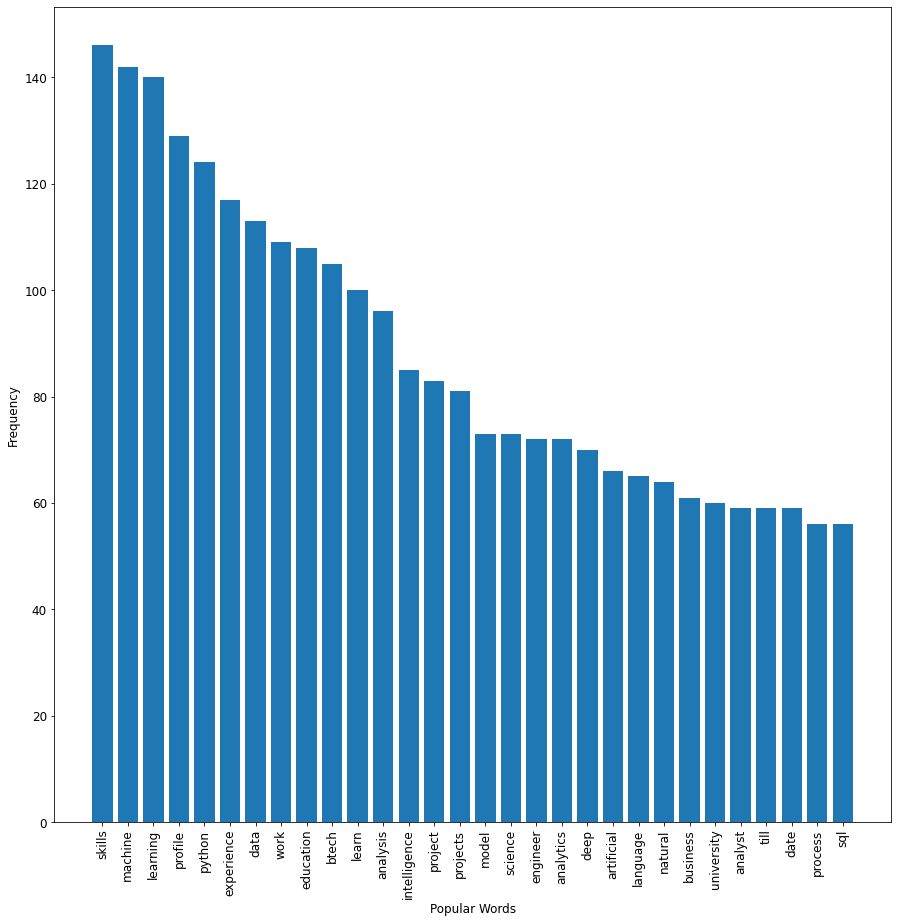

In [128]:
# Plot the most common 30 words :
popular_words = []
Freq = []
for i in mostcommon[0:30]:
    popular_words.append(i[0])
    Freq.append(i[1])
plt.figure(figsize=(15,15))
plt.bar(popular_words , Freq )
plt.xlabel(xlabel="Popular Words")
plt.ylabel(ylabel="Frequency")
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 12) 
plt.rc('ytick', labelsize = 12) 
plt.rc('axes', labelsize = 12)
plt.show()

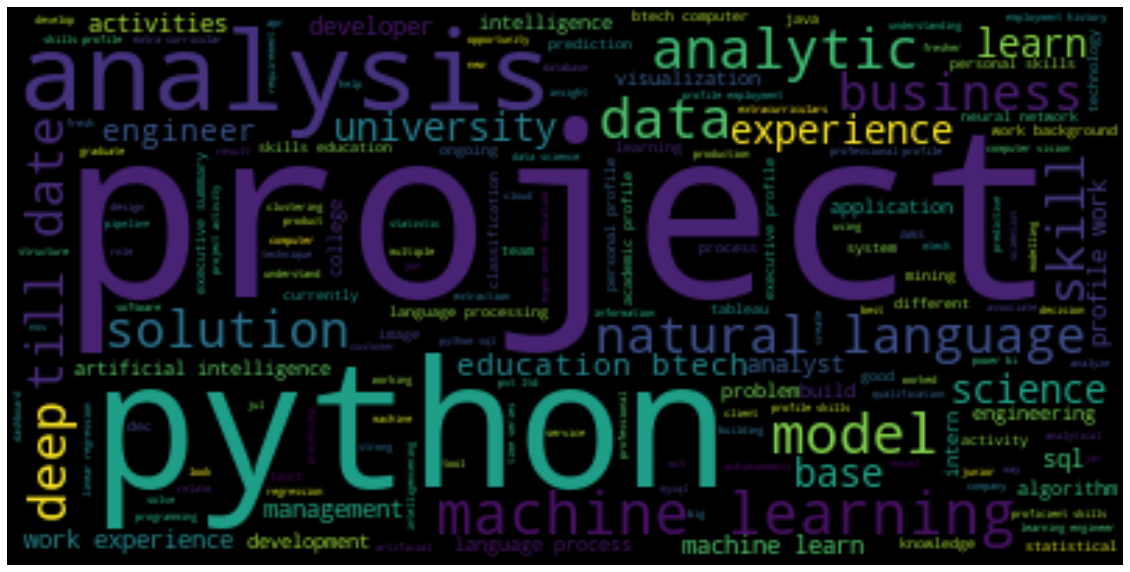

In [129]:
# Wordcloud display :

wc = WordCloud().generate("".join(Job_Description)+ "".join(train.Description)+
                          "".join(test.Description))              # wordcloud is generated
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Intersection of words between the files : 

In [130]:
# Lets print the intersection words in these datasets :
reduce(np.intersect1d , (pd.Series(wordfreqdist).index.unique() , pd.Series(wordfreqdist2).index.unique(),
                        pd.Series(wordfreqdist3).index.unique()))

array(['algorithm', 'analyze', 'application', 'architecture',
       'artificial', 'associate', 'automate', 'aws', 'azure', 'big',
       'build', 'classification', 'cloud', 'clustering', 'cnn',
       'computer', 'course', 'create', 'data', 'database', 'deep',
       'define', 'degree', 'deploy', 'design', 'detect', 'different',
       'django', 'engineer', 'evaluation', 'experience', 'expertise',
       'familiar', 'feature', 'focus', 'google', 'hadoop', 'innovation',
       'intelligence', 'job', 'keras', 'knowledge', 'language', 'learn',
       'library', 'logistic', 'machine', 'master', 'matplotlib', 'method',
       'model', 'mongodb', 'natural', 'networks', 'neural', 'nltk',
       'nosql', 'numpy', 'object', 'ocr', 'opencv', 'pandas', 'platform',
       'predict', 'process', 'product', 'provide', 'pyspark', 'pytorch',
       'qualification', 'reduce', 'regression', 'require', 'research',
       'responsible', 'rnn', 'scale', 'science', 'scikit', 'seaborn',
       'set', 'soluti

In [161]:
# normalizing :
def text_normalize(text):
    text = re.sub("analytics","analyze",text)
    text = re.sub("analytic","analyze",text)
    text = re.sub("like" , "" , text)
    text = re.sub("analytical","analyze",text)
    text = re.sub("analysis","analyze",text)
    text = re.sub("clustering","cluster",text)
    text = re.sub("deployment","deploy",text)
    text = re.sub("detection","detect",text)
    text = re.sub("learning","learn",text)
    text = re.sub("models","model",text)
    text = re.sub("methodology","method",text)
    text = re.sub("prediction","predict",text)
    text = re.sub("predictive","predict",text)
    text = re.sub("processing","process",text)
    text = re.sub("production","product",text)
    text = re.sub("requirement","require",text)
    text = re.sub("selection","select",text)
    text = re.sub("transformers","transformer",text)
    text = re.sub("type","",text)

    return text


# Normalization on datasets :

# for train data :
text = []
for value in train.Description:
    text.append(remove_extra_spaces(remove_duplicate(text_normalize(value))))
train['Description'] = text

# for test data :
text = []
for value in test.Description:
    text.append(remove_extra_spaces(remove_duplicate(text_normalize(value))))
test['Description'] = text 

# for job description :
Job_Description = remove_extra_spaces(remove_duplicate(text_normalize(''.join(Job_Description))))

### We took care of normalizing important words in the three datasets viz Job Description ,Train data ,Test data 

### Lets match keywords in each row representating resume of each candidates in the train and test datasets with job description 

In [162]:
def match_keywords(text):     # matching each resume with 'Job Description'
    line = []
    for val in text :
        keywords = nltk.FreqDist(nltk.word_tokenize("".join(val)))
        match_words = reduce(np.intersect1d , (pd.Series(keywords).index.unique() , 
                                               pd.Series(wordfreqdist).index.unique()))
        match_words = np.array(match_words).reshape(-1)
        line.append(" ".join(match_words))
    return line

In [163]:
train['match_words'] = match_keywords(train['Description'].values)
test['match_words'] = match_keywords(test['Description'].values)

print("Train sample of row 1 :" , train['match_words'][1])
print("Test sample of row 1 :" ,test['match_words'][1])

Train sample of row 1 : analyze big data experience hadoop knowledge language learn logistic machine natural networks neural process regression solution work
Test sample of row 1 : analyze artificial aws cloud data deep deploy expertise intelligence learn machine model predict product solution


## Model Build [ Method 1 :Tf-idf (Term Frequency Inverse Document Frequency) vectorizer of words]: 

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
model.fit_transform(["".join(Job_Description)])

t = model.transform([Job_Description])
t = t.todense()
t = np.array(t).reshape(-1)

def similarity(arr):
    match=[]
    for val in arr:
        score = model.transform([val])
        score = score.todense()[0]
        score = np.array(score).reshape(-1)
        match.append(round(cosine(score,t),2))
    return match

    
# cosine similarity / centralized pearson correlation :

def cosine(u, v):
    return np.dot(u, v)*100 / (np.linalg.norm(u) * np.linalg.norm(v))


## Model Performance (Method 1) : 

In [166]:
print("Model report on match percentage on train data :",np.array(similarity(train['match_words'])).tolist())
print("\nActual match percentage on train data :",np.array(train['Match Percentage']).tolist())
print("\nEvaluation based on centralized pearson correlation :",
      cosine(train['Match Percentage'] , similarity(train['match_words']))/100)

Model report on match percentage on train data : [38.12, 38.12, 41.34, 40.3, 34.59, 33.33, 40.3, 44.34, 38.12, 29.24, 41.34, 36.98, 34.59, 42.37, 46.23, 39.22, 41.34, 32.03, 42.37, 36.98, 32.03, 39.22, 36.98, 39.22, 40.3, 33.33, 29.24, 34.59, 39.22, 35.81, 33.33, 41.34, 36.98, 44.34, 42.37, 44.34, 42.37, 34.59, 53.11, 42.37, 29.24, 40.3, 39.22, 46.23, 32.03, 35.81, 40.3, 30.66, 38.12, 41.34, 35.81, 42.37, 33.33, 35.81, 41.34, 36.98, 42.37, 39.22, 40.3, 32.03, 39.22, 42.37, 36.98, 27.74, 40.3, 32.03, 32.03, 27.74, 45.29, 50.64, 33.33, 45.29, 35.81, 36.98, 40.3, 33.33, 35.81, 42.37, 46.23, 36.98, 42.37, 48.92, 34.59, 40.3, 44.34, 26.15, 36.98, 34.59, 45.29, 36.98]

Actual match percentage on train data : [13.6, 36.63, 54.93, 41.46, 48.91, 50.4, 44.96, 48.62, 11.14, 6.46, 57.8, 6.0, 51.05, 40.86, 46.44, 41.02, 50.86, 47.9, 42.1, 36.44, 40.64, 48.7, 14.14, 51.57, 39.95, 44.36, 13.21, 41.2, 41.6, 48.49, 50.82, 58.0, 39.95, 50.26, 35.02, 47.08, 48.37, 60.11, 46.16, 48.2, 8.01, 37.42, 4.81, 4

## Prediction of Match Percentage of Job Description in the test data containing 60 resumes of candidates : 

In [177]:
t = similarity(test['match_words']))
print("Model report on match percentage on test data :", np.array(t.tolist()))

Model report on match percentage on test data : [32.03 30.66 38.12 36.98 43.36 40.3  47.14 35.81 33.33 38.12 39.22 40.3
 41.34 27.74 29.24 30.66 39.22 36.98 40.3  35.81 41.34 38.12 30.66 29.24
 27.74 36.98 47.14 38.12 36.98 38.12 34.59 30.66 39.22 41.34 34.59 30.66
 32.03 43.36 34.59 41.34 41.34 29.24 45.29 26.15 39.22 40.3  32.03 36.98
 34.59 33.33 35.81 33.33 33.33 34.59 32.03 42.37 43.36 32.03 38.12 35.81]


## Export to csv file : 

In [179]:
output = pd.DataFrame({'CandidateID': test['CandidateID'],
                       'Match Percentage' : t})
output

,CandidateID,Match Percentage
0,candidate_014,32.03
1,candidate_098,30.66
2,candidate_075,38.12
3,candidate_016,36.98
4,candidate_131,43.36
5,candidate_056,40.30
6,candidate_141,47.14
7,candidate_044,35.81
8,candidate_029,33.33
9,candidate_120,38.12


In [180]:
output.to_csv(r'C:/Users/Avik/Desktop/output.csv',header=True , index=False)

In [ ]:
# Leaderboard score 62.44 , rank 36 #

## ---------------------------------------- HURRAH DONE Resume Matching ! ---------------------------------- 